In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Load your dataset
data = pd.read_csv('Breast_cancer_data.csv')

In [ ]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 569 rows and 6 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
## check null entries
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
## remove duplicate entries
data.drop_duplicates(inplace = True)
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


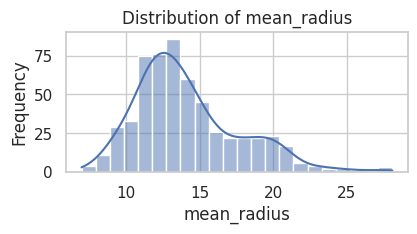

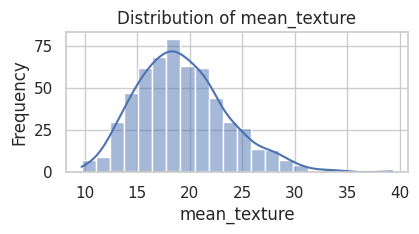

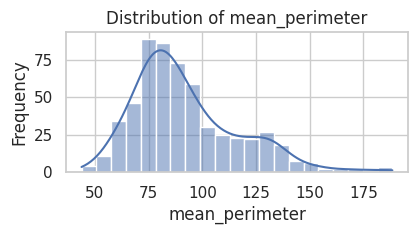

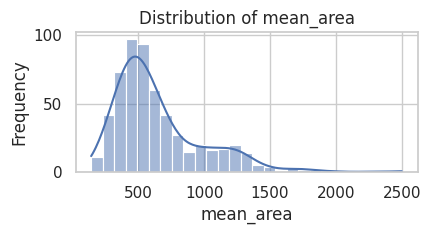

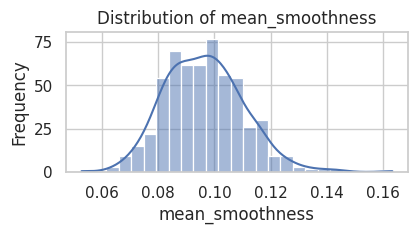

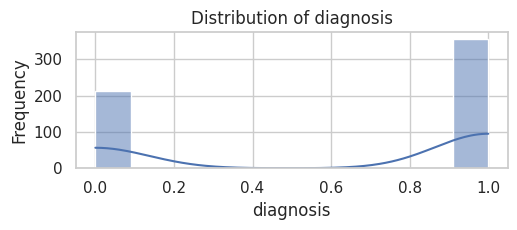

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the number of columns for subplots (adjust this based on the number of features)
num_cols = 3

# List of numerical feature columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Calculate the number of rows required based on the number of features and num_cols
num_rows = (len(numerical_columns) - 1) // num_cols + 1

# Create subplots for each numerical feature
for i, column in enumerate(numerical_columns, 1):
    plt.figure(figsize=(15, 4))
    plt.subplot(num_rows, num_cols, i)

    # Plot the distribution
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis']  # Target variable

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (398, 5) (398,)
Testing set shape (X, y): (171, 5) (171,)


Evaluating Logistic Regression...
Cross-Validation Accuracy: 0.89 (+/- 0.06)
Test Accuracy: 0.94
Test Precision: 0.96
Test Recall: 0.94
Test F1 Score: 0.95
Test ROC AUC Score: 0.99



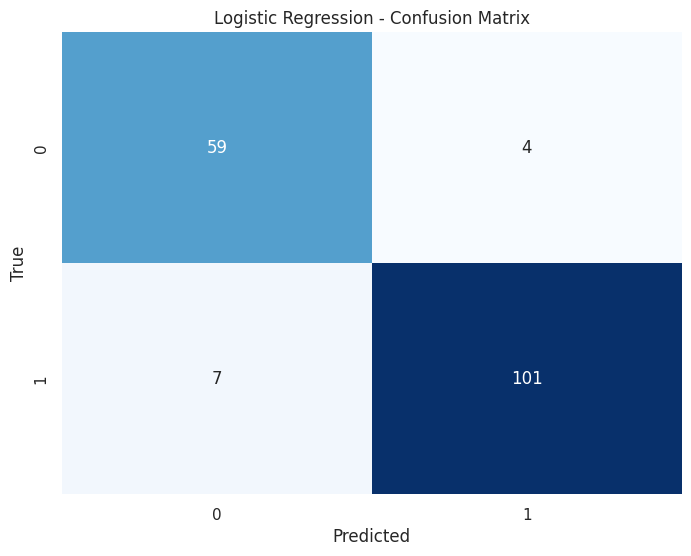

Evaluating Decision Tree...
Cross-Validation Accuracy: 0.87 (+/- 0.07)
Test Accuracy: 0.87
Test Precision: 0.91
Test Recall: 0.89
Test F1 Score: 0.90
Test ROC AUC Score: 0.87



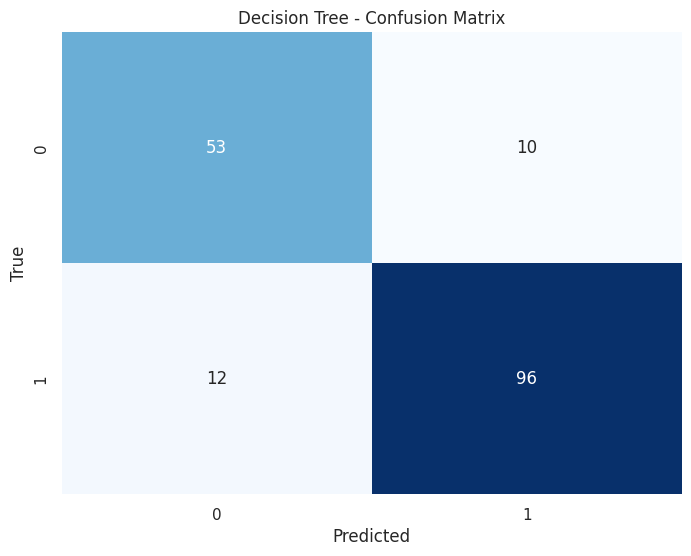

Evaluating Random Forest...
Cross-Validation Accuracy: 0.91 (+/- 0.06)
Test Accuracy: 0.96
Test Precision: 0.98
Test Recall: 0.96
Test F1 Score: 0.97
Test ROC AUC Score: 1.00



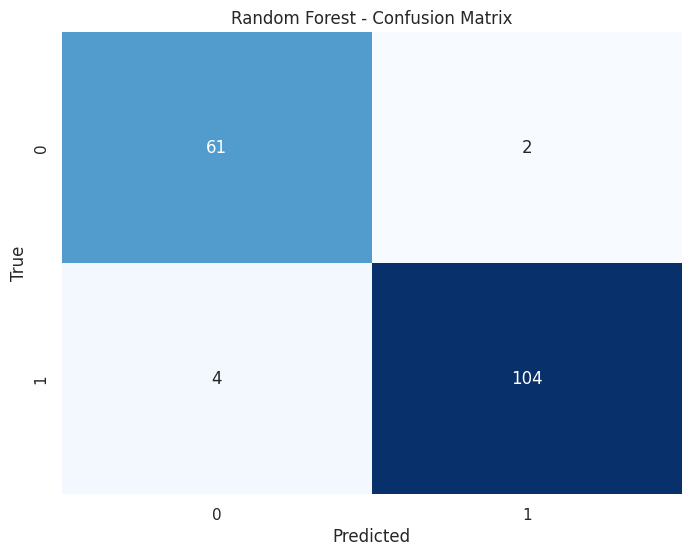

Evaluating Support Vector Machine...
Cross-Validation Accuracy: 0.86 (+/- 0.06)
Test Accuracy: 0.89
Test Precision: 0.85
Test Recall: 1.00
Test F1 Score: 0.92
Test ROC AUC Score: 0.97



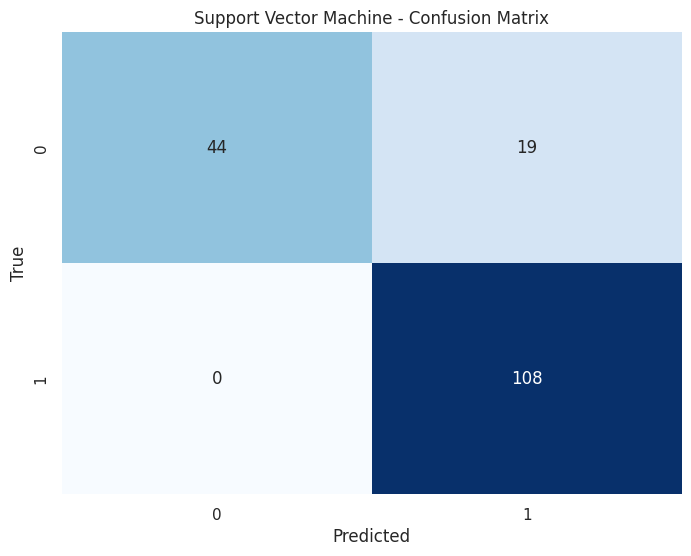

Evaluating Gradient Boosting...
Cross-Validation Accuracy: 0.90 (+/- 0.08)
Test Accuracy: 0.95
Test Precision: 0.97
Test Recall: 0.94
Test F1 Score: 0.96
Test ROC AUC Score: 0.99



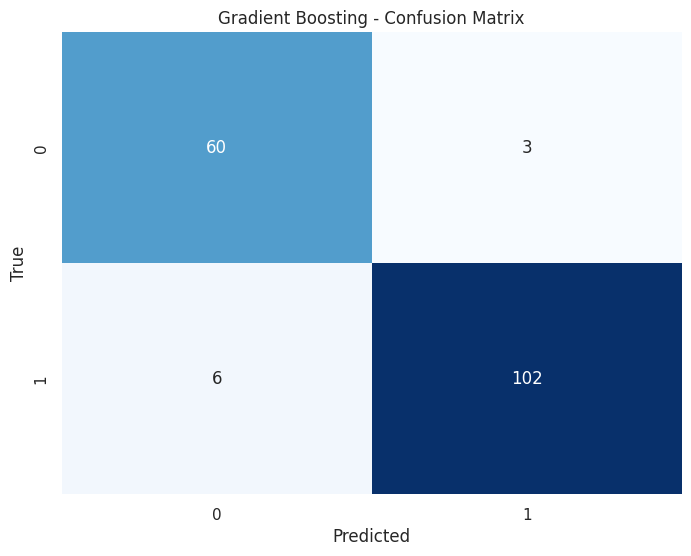

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Define a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC(probability=True)),
    ("Gradient Boosting", GradientBoostingClassifier())
]

for clf_name, clf in classifiers:
    print(f"Evaluating {clf_name}...")

    # Perform cross-validation on the training set
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Recall: {recall:.2f}")
    print(f"Test F1 Score: {f1:.2f}")
    print(f"Test ROC AUC Score: {roc_auc:.2f}\n")

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{clf_name} - Confusion Matrix")
    plt.show()

In [ ]:
import joblib

# Create a Gradient Boosting classifier
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")
print(f"Test ROC AUC Score: {roc_auc:.2f}")

# Save the trained model to a file
joblib.dump(model, 'breast_cancer_model.pkl')


Test Accuracy: 0.97
Test Precision: 0.98
Test Recall: 0.97
Test F1 Score: 0.98
Test ROC AUC Score: 0.99


['breast_cancer_model.pkl']

In [ ]:
# Load the trained model
model = joblib.load('breast_cancer_model.pkl')

def predict_diagnosis(features):
    # Make a prediction
    prediction = model.predict([features])
    return "Malignant" if prediction[0] == 1 else "Benign"

# Define feature values
mean_radius = 13.54
mean_texture = 14.36
mean_perimeter = 87.46
mean_area = 566.3
mean_smoothness = 0.09779

# Create a feature list
features = [mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]

# Make a prediction
result = predict_diagnosis(features)
print(f"Predicted Diagnosis: {result}")


Predicted Diagnosis: Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Define feature values
mean_radius = 16.16
mean_texture = 21.54
mean_perimeter = 106.2
mean_area = 809.8
mean_smoothness = 0.1008

# Create a feature list
features = [mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]

# Make a prediction
result = predict_diagnosis(features)
print(f"Predicted Diagnosis: {result}")

Predicted Diagnosis: Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
